In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '../../..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hydramuscle.utils import plot
from hydramuscle.model.fluo_encoder import FluoEncoder

In [2]:
INIT1 = 100+20
INIT2 = 184.3+20
INIT3 = 284.7+20
INIT4 = 376.4+20

MOMENTS = [INIT1+1, INIT1+5, INIT1+10, INIT1+20,
           INIT2+1, INIT2+5, INIT2+10, INIT2+20,
           INIT3+1, INIT3+5, INIT3+10, INIT3+20,
           INIT4+1, INIT4+5, INIT4+10, INIT4+20,]

In [3]:
def plot_ims(filename, vmin=0, vmax=1.5, moments=MOMENTS, start=0, end=500):

    # Read the simulation results
    calcium = pd.read_hdf("../../results/data/calcium/" + filename + ".h5")
    calcium = calcium.values.reshape(len(calcium), 60, 60)
    ca_ecto = calcium[:, :30, :]
#     print(ca_ecto.shape)

    dt = 0.02
    
    fig = plt.figure(figsize=(20,5))

    for j, moment in enumerate(moments):
        ax = fig.add_subplot(1, len(moments), j+1)
        index = int(moment / dt)
        im = np.flip(ca_ecto[index].T, 0)
        ax.imshow(im, cmap='hot', vmin=vmin, vmax=vmax)
        ax.set_title(str(moment) + 's')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
    ca_avg = np.mean(np.mean(ca_ecto, 1), 1)
    fluo_encoder = FluoEncoder(ca_avg, T=500, dt=0.02)
    fluo = fluo_encoder.step()
    fluo = (fluo - min(fluo))/(max(fluo) - min(fluo))
    
    plt.figure(figsize=(20,5))
    plt.plot(np.arange(start, end, 0.02), ca_avg[int(start/0.02) : int(end/0.02)], linewidth=3)
    plt.plot(np.arange(start, end, 0.02), fluo[int(start/0.02) : int(end/0.02)], 'g', linewidth=3)
    plt.show()

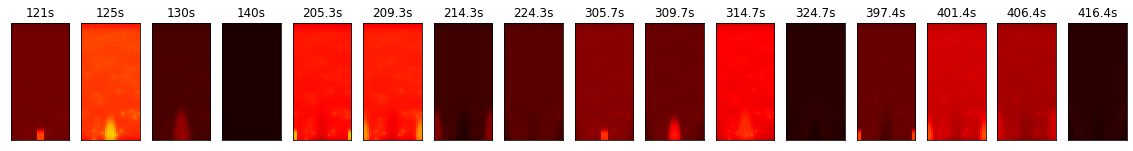

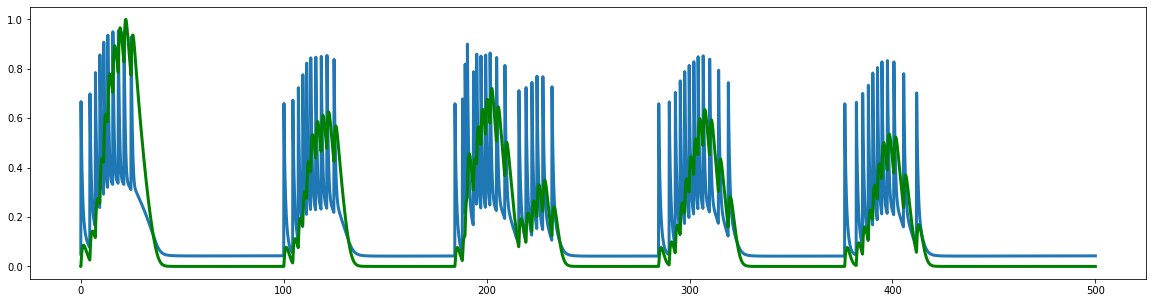

In [25]:
# k_ipr = 0.2, k_deg = 0.2
plot_ims("2020-09-21-23-56-44-639463")

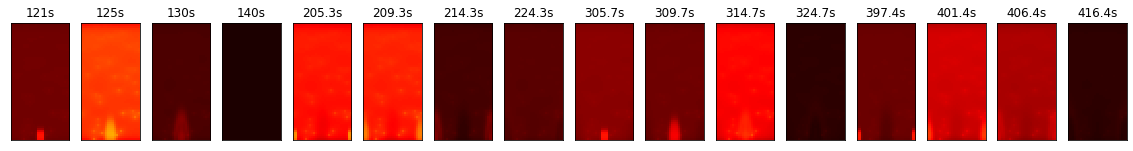

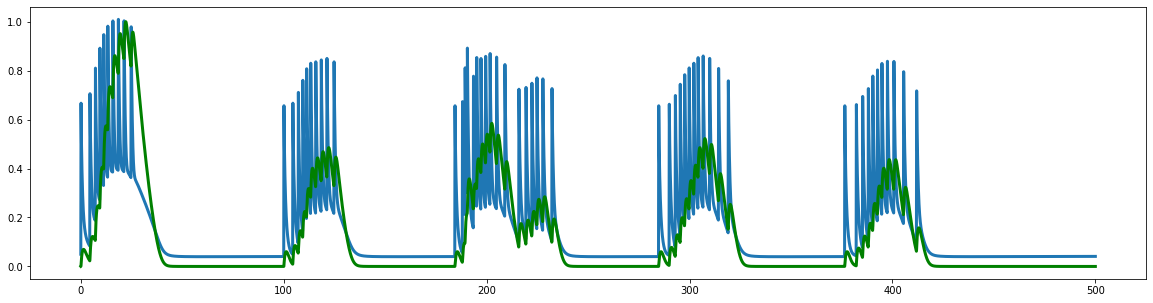

In [26]:
# k_ipr = 0.2, k_deg = 0.15
plot_ims("2020-09-21-23-59-45-573184")

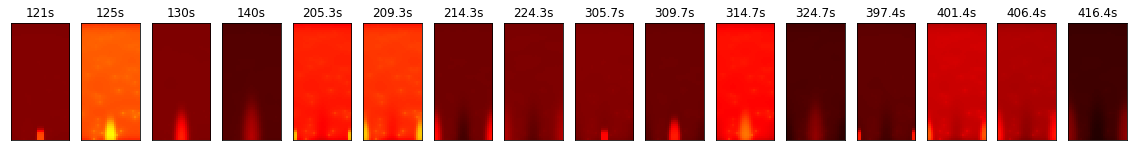

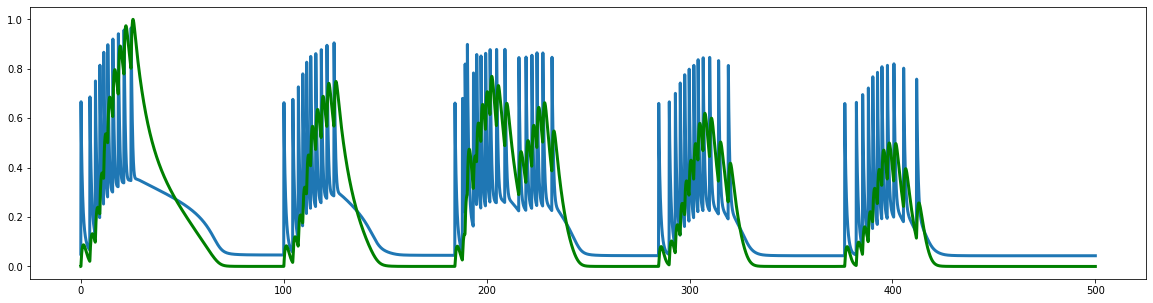

In [27]:
# k_ipr = 0.02, k_deg = 0.15, s0 = 600
plot_ims("2020-09-21-23-59-31-978715")

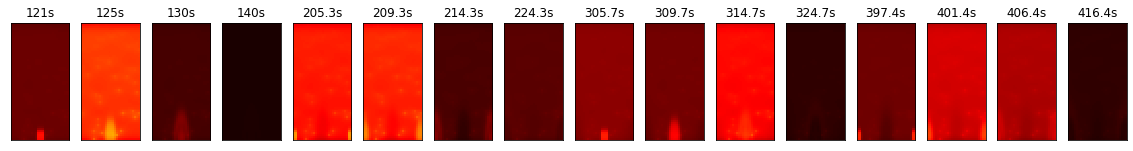

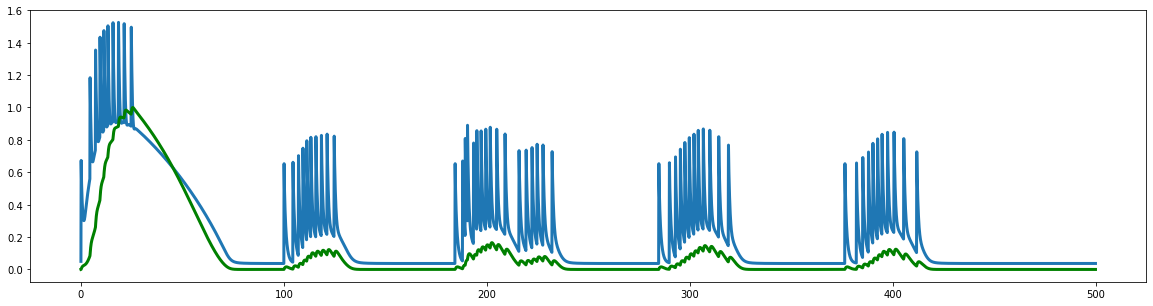

In [28]:
# k_ipr = 0.2, k_deg = 0.15, s0 = 600
plot_ims("2020-09-21-23-59-21-961697")

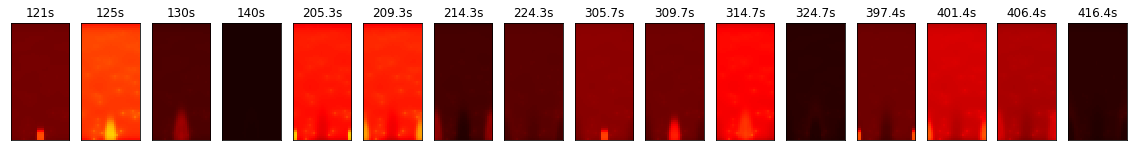

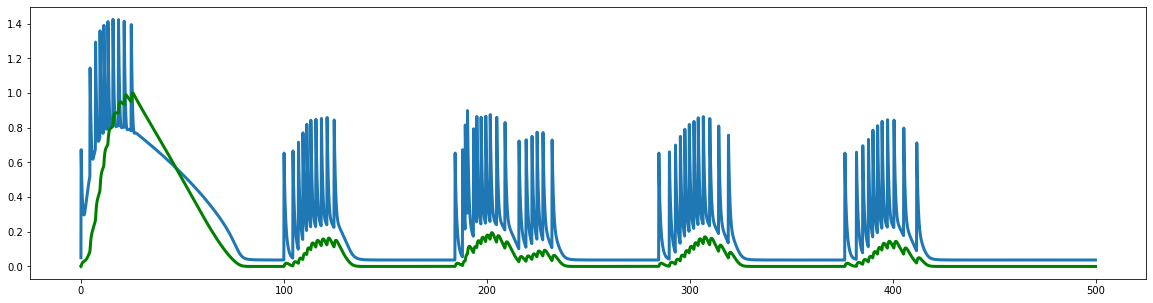

In [29]:
# k_ipr = 0.2, k_deg = 0.2, s0 = 600
plot_ims("2020-09-21-23-56-56-901839")

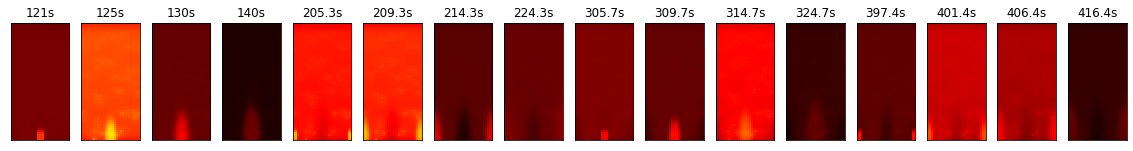

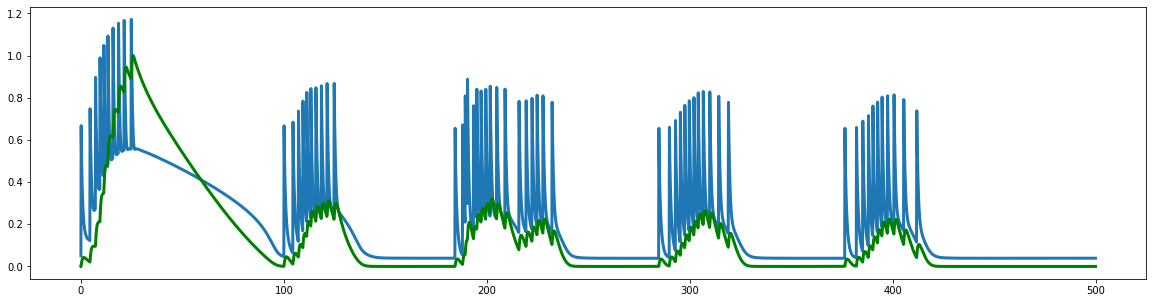

In [31]:
# k_ipr = 0.05, k_deg = 0.15, s0 = 600
plot_ims("2020-09-21-23-56-55-734125")

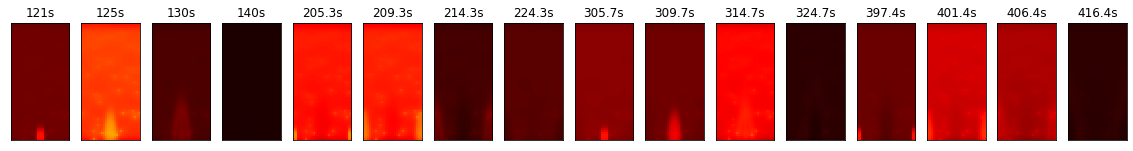

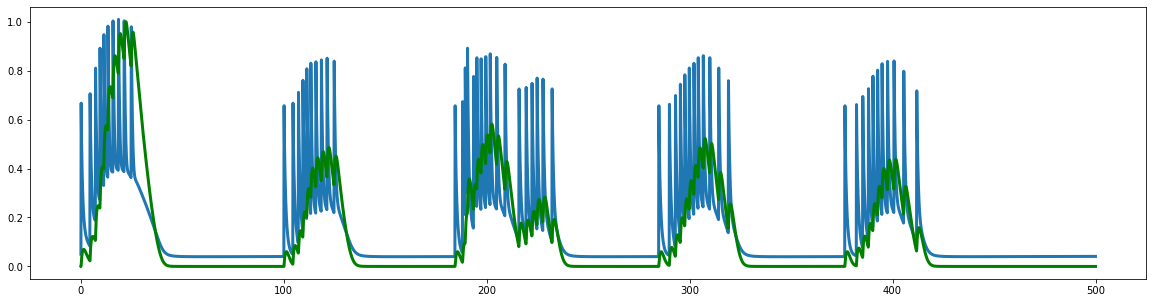

In [5]:
# k_ipr = 0.1, k_deg = 0.15, s0 = 100, gip3=0.5
plot_ims("2020-09-22-14-52-42-970227")

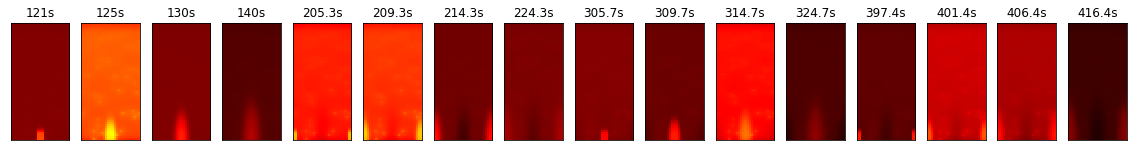

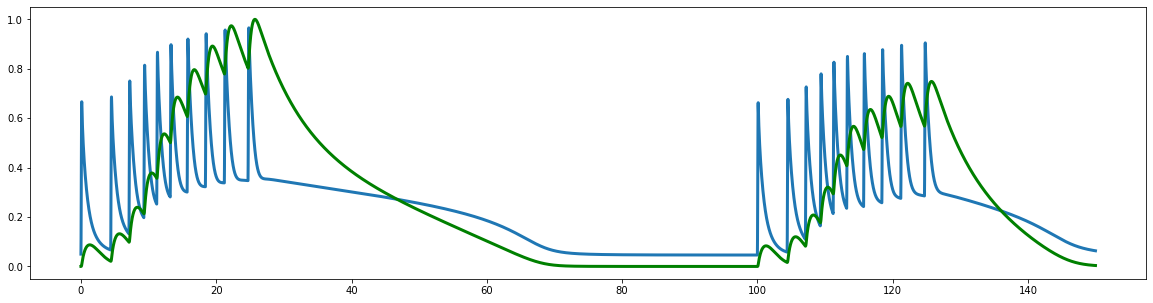

In [10]:
# k_ipr = 0.02, k_deg = 0.15, s0 = 600
plot_ims("2020-09-21-23-59-31-978715", start=0, end=150)

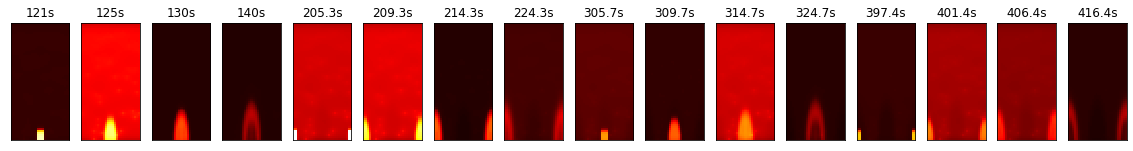

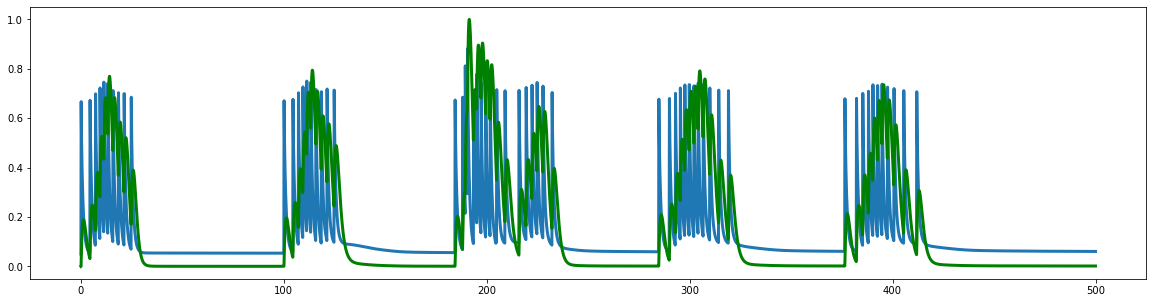

In [12]:
# k_ipr = 0.2, k_deg = 0.05, s0 = 100, v_delta = 0
plot_ims("2020-09-23-16-11-16-728521")

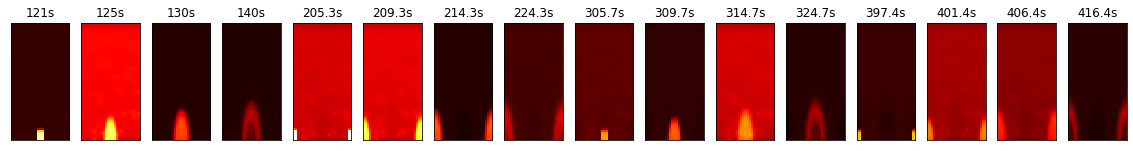

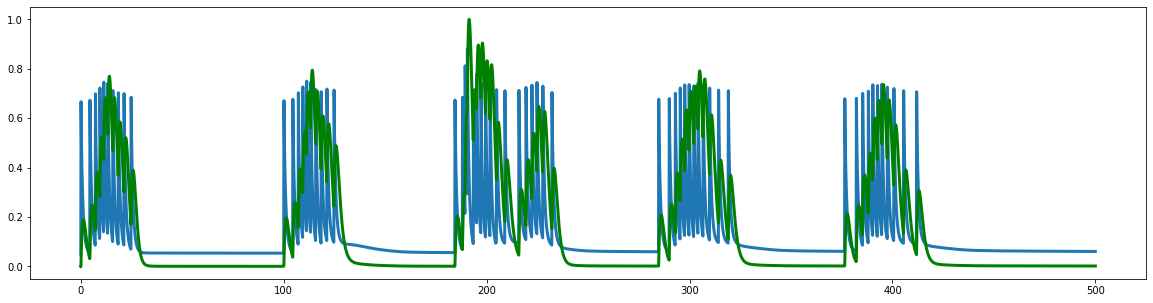

In [5]:
# k_ipr = 0.2, k_deg = 0.05, s0 = 100, v_delta = 0
plot_ims("2020-09-23-16-11-16-728521")